In [107]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")


import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import geopandas as gpd
import math
import random

# Step 4: Working with Weather Data

In [108]:
# import the weather data
wd = pd.read_csv("SanFrancisco", encoding="ISO-8859-1", index_col=0)
# show first 20 rows
wd.head(20)

timestamp  temperature  cloud_cover  \
city                                                           
San Francisco  2015-01-01 08:56:00          7.0         33.0   
San Francisco  2015-01-01 09:56:00          4.0         33.0   
San Francisco  2015-01-01 10:56:00         10.0         33.0   
San Francisco  2015-01-01 11:56:00          9.0         33.0   
San Francisco  2015-01-01 12:56:00          9.0         33.0   
San Francisco  2015-01-01 13:56:00          9.0         33.0   
San Francisco  2015-01-01 14:56:00          9.0         34.0   
San Francisco  2015-01-01 15:56:00          9.0         34.0   
San Francisco  2015-01-01 16:56:00         10.0         34.0   
San Francisco  2015-01-01 17:56:00         11.0         34.0   
San Francisco  2015-01-01 18:56:00         11.0         34.0   
San Francisco  2015-01-01 19:56:00         12.0         34.0   
San Francisco  2015-01-01 20:56:00         12.0         34.0   
San Francisco  2015-01-01 21:56:00         12.0         34.0   
San Francisco  2015-01-01 22:56:00         12.0         34.0   
San Francisco  2015-01-01 23:56:00         12.0         34.0   
San Francisco  2015-01-02 00:56:00         11.0         30.0   
San Francisco  2015-01-02 01:56:00         11.0         33.0   
San Francisco  2015-01-02 02:56:00         10.0         33.0   
San Francisco  2015-01-02 03:56:00          9.0         33.0   

              cloud_cover_description  pressure  windspeed  precipitation  \
city                                                                        
San Francisco                    Fair   1018.26        6.0            0.0   
San Francisco                    Fair   1018.60        6.0            0.0   
San Francisco                    Fair   1018.60       28.0            0.0   
San Francisco                    Fair   1018.60       19.0            0.0   
San Francisco                    Fair   1018.60       20.0            0.0   
San Francisco                    Fair   1018.94       15.0            0.0   
San Francisco                    Fair   1019.62       28.0            0.0   
San Francisco                    Fair   1019.96       22.0            0.0   
San Francisco                    Fair   1020.63       19.0            0.0   
San Francisco                    Fair   1021.31       26.0            0.0   
San Francisco                    Fair   1020.97       24.0            0.0   
San Francisco                    Fair   1019.96       19.0            0.0   
San Francisco                    Fair   1019.62       11.0            0.0   
San Francisco                    Fair   1018.94       15.0            0.0   
San Francisco                    Fair   1019.28       22.0            0.0   
San Francisco                    Fair   1019.96        9.0            0.0   
San Francisco           Partly Cloudy   1020.29       11.0            0.0   
San Francisco                    Fair   1020.29       15.0            0.0   
San Francisco                    Fair   1020.63        9.0            0.0   
San Francisco                    Fair   1020.63        6.0            0.0   

               felt_temperature  
city                             
San Francisco               7.0  
San Francisco               4.0  
San Francisco              10.0  
San Francisco               7.0  
San Francisco               6.0  
San Francisco               6.0  
San Francisco               5.0  
San Francisco               6.0  
San Francisco              10.0  
San Francisco              11.0  
San Francisco              11.0  
San Francisco              12.0  
San Francisco              12.0  
San Francisco              12.0  
San Francisco              12.0  
San Francisco              12.0  
San Francisco              11.0  
San Francisco              11.0  
San Francisco              10.0  
San Francisco               9.0

In [328]:
# take a look at the data types and general information
wd.info()
wd.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 76631 entries, San Francisco to San Francisco
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.3+ MB


temperature   cloud_cover      pressure     windspeed  precipitation   
count  76619.000000  76630.000000  76613.000000  76592.000000   76631.000000  \
mean      14.645388     29.215020   1016.244545     16.562722       0.062102   
std        4.030852      5.110355      4.866743     11.432207       0.456781   
min        2.000000      4.000000    986.440000      0.000000       0.000000   
25%       12.000000     27.000000   1013.190000      7.000000       0.000000   
50%       14.000000     29.000000   1015.890000     15.000000       0.000000   
75%       17.000000     33.000000   1019.280000     24.000000       0.000000   
max       39.000000     47.000000   1035.530000    391.000000      18.540000   

       felt_temperature  
count      76614.000000  
mean          14.534915  
std            4.203518  
min           -1.000000  
25%           12.000000  
50%           14.000000  
75%           17.000000  
max           37.000000

In [109]:
# convert timestamp to datetime
wd['timestamp'] = pd.to_datetime(wd['timestamp'],format ='%Y-%m-%d %H:%M:%S')

# extract the year from timestamp
wd['year'] = wd['timestamp'].dt.year

# only the data for the year 2019 is important, so we drop all the other entries.
wd = wd[wd['timestamp'].dt.year == 2019]

In [330]:
# check first 20 entries 
wd.head(20)

timestamp  temperature  cloud_cover   
city                                                          
San Francisco 2019-01-01 00:56:00         12.0         30.0  \
San Francisco 2019-01-01 01:56:00         12.0         33.0   
San Francisco 2019-01-01 02:56:00         12.0         33.0   
San Francisco 2019-01-01 03:56:00         12.0         33.0   
San Francisco 2019-01-01 04:56:00         11.0         33.0   
San Francisco 2019-01-01 05:56:00         11.0         33.0   
San Francisco 2019-01-01 06:56:00         10.0         33.0   
San Francisco 2019-01-01 07:56:00         11.0         33.0   
San Francisco 2019-01-01 08:56:00         11.0         33.0   
San Francisco 2019-01-01 09:56:00         10.0         33.0   
San Francisco 2019-01-01 10:56:00          9.0         33.0   
San Francisco 2019-01-01 11:56:00          9.0         33.0   
San Francisco 2019-01-01 12:56:00          8.0         33.0   
San Francisco 2019-01-01 13:56:00          9.0         33.0   
San Francisco 2019-01-01 14:56:00          9.0         34.0   
San Francisco 2019-01-01 15:56:00          8.0         30.0   
San Francisco 2019-01-01 16:56:00          8.0         28.0   
San Francisco 2019-01-01 17:56:00          8.0         28.0   
San Francisco 2019-01-01 18:56:00         10.0         30.0   
San Francisco 2019-01-01 19:56:00         10.0         30.0   

              cloud_cover_description  pressure  windspeed  precipitation   
city                                                                        
San Francisco           Partly Cloudy   1016.23       31.0            0.0  \
San Francisco            Fair / Windy   1016.57       35.0            0.0   
San Francisco            Fair / Windy   1017.25       46.0            0.0   
San Francisco            Fair / Windy   1017.25       44.0            0.0   
San Francisco            Fair / Windy   1017.92       35.0            0.0   
San Francisco            Fair / Windy   1017.59       52.0            0.0   
San Francisco            Fair / Windy   1017.92       44.0            0.0   
San Francisco                    Fair   1018.60       30.0            0.0   
San Francisco                    Fair   1018.94       31.0            0.0   
San Francisco                    Fair   1019.62       30.0            0.0   
San Francisco            Fair / Windy   1020.63       37.0            0.0   
San Francisco            Fair / Windy   1020.97       33.0            0.0   
San Francisco                    Fair   1021.31        9.0            0.0   
San Francisco                    Fair   1022.33       20.0            0.0   
San Francisco                    Fair   1023.00       22.0            0.0   
San Francisco           Partly Cloudy   1024.02       19.0            0.0   
San Francisco           Mostly Cloudy   1024.36       19.0            0.0   
San Francisco           Mostly Cloudy   1024.70       15.0            0.0   
San Francisco           Partly Cloudy   1024.02       15.0            0.0   
San Francisco           Partly Cloudy   1024.36        0.0            0.0   

               felt_temperature  year  
city                                   
San Francisco              12.0  2019  
San Francisco              12.0  2019  
San Francisco              12.0  2019  
San Francisco              12.0  2019  
San Francisco              11.0  2019  
San Francisco              11.0  2019  
San Francisco              10.0  2019  
San Francisco              11.0  2019  
San Francisco              11.0  2019  
San Francisco              10.0  2019  
San Francisco               5.0  2019  
San Francisco               4.0  2019  
San Francisco               7.0  2019  
San Francisco               6.0  2019  
San Francisco               6.0  2019  
San Francisco               5.0  2019  
San Francisco               4.0  2019  
San Francisco               6.0  2019  
San Francisco              10.0  2019  
San Francisco              10.0  2019

In [331]:
# after transforming the data we check if there are any non-defined values.
wd.isna().sum()

timestamp                  0
temperature                3
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  6
precipitation              0
felt_temperature           4
year                       0
dtype: int64

In [110]:
# drop all rows with missing values
weather_2019 = wd.dropna(axis = 0)
weather_2019.info()
weather_2019.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9494 entries, San Francisco to San Francisco
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9494 non-null   datetime64[ns]
 1   temperature              9494 non-null   float64       
 2   cloud_cover              9494 non-null   float64       
 3   cloud_cover_description  9494 non-null   object        
 4   pressure                 9494 non-null   float64       
 5   windspeed                9494 non-null   float64       
 6   precipitation            9494 non-null   float64       
 7   felt_temperature         9494 non-null   float64       
 8   year                     9494 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 741.7+ KB


temperature  cloud_cover     pressure    windspeed  precipitation  \
count  9494.000000  9494.000000  9494.000000  9494.000000    9494.000000   
mean     14.692753    28.796398  1015.035008    16.785338       0.079433   
std       4.296878     5.498910     4.908431    11.103065       0.486799   
min       3.000000     4.000000   993.550000     0.000000       0.000000   
25%      12.000000    27.000000  1012.510000     7.000000       0.000000   
50%      14.000000    29.000000  1014.880000    15.000000       0.000000   
75%      17.000000    33.000000  1017.920000    24.000000       0.000000   
max      36.000000    40.000000  1030.790000    67.000000      11.940000   

       felt_temperature    year  
count       9494.000000  9494.0  
mean          14.549821  2019.0  
std            4.491948     0.0  
min            1.000000  2019.0  
25%           12.000000  2019.0  
50%           14.000000  2019.0  
75%           17.000000  2019.0  
max           34.000000  2019.0

In [334]:
def bike_count(df):
    df = df.groupby('station_id')
    results = [] 
    
    for group_name, group_data in df:
        group_data.sort_values(by='timestamp', inplace=True)
        group_data.reset_index(drop=True, inplace=True)
        bike_count = 0
        
        for index, row in group_data.iterrows():
            if row['rented'] == 0:
                bike_count += 1
            else:
                bike_count -= 1
            
            if bike_count < 0:
                bike_count = 0
                
            group_data.at[index, 'bike_count'] = bike_count
            
        
        results.append(group_data)

    modified_df = pd.concat(results, ignore_index=True)
    return modified_df


In [335]:
df_w_idle_time = bike_count(df_w_idle_time)
df_w_idle_time.to_csv('bike_count included')

In [112]:
df_w_idle_time = pd.read_csv('bike_count included')

In [111]:
weather_2019['timestamp'] = weather_2019['timestamp'].dt.floor('H')
weather_2019.drop_duplicates(subset='timestamp', inplace = True)


/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_23624/1960210810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2019['timestamp'] = weather_2019['timestamp'].dt.floor('H')
/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_23624/1960210810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2019.drop_duplicates(subset='timestamp', inplace = True)


In [113]:
# extract the hours of the weather data and the data with idle time


# Now we want to extract the hours of the weather data and match them with idle time
df_w_idle_time["timestamp"]= pd.to_datetime(df_w_idle_time["timestamp"],format ='%Y-%m-%d %H:%M:%S')
df_w_idle_time['timestamp'] = df_w_idle_time['timestamp'].dt.floor('H')
df_w_idle_time = df_w_idle_time[df_w_idle_time['rented'] == 0]



# Merge two tables 
df_features= pd.merge(df_w_idle_time, weather_2019, on='timestamp',how= 'left')

# convert idle_time to minutess
df_features['idle_time'] = pd.to_timedelta(df_features['idle_time']).dt.total_seconds() / 3600.0

df_features

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0           timestamp  \
0                   0             0           0 2019-01-01 01:00:00   
1                   1             7           7 2019-01-01 09:00:00   
2                   2             8           8 2019-01-01 09:00:00   
3                   3             9           9 2019-01-01 09:00:00   
4                   4            10          10 2019-01-01 10:00:00   
...               ...           ...         ...                 ...   
2407240       2407240       4814479     4814479 2019-12-23 17:00:00   
2407241       2407241       4814481     4814481 2019-12-24 10:00:00   
2407242       2407242       4814485     4814485 2019-12-30 14:00:00   
2407243       2407243       4814487     4814487 2019-12-30 14:00:00   
2407244       2407244       4814489     4814489 2019-12-31 12:00:00   

         station_id  bike_id  rented  idle_time  bike_count  temperature  \
0                 3     5426       0   0.000000           1         12.0   
1                 3     2191       0   1.888056           1         10.0   
2                 3     5063       0   1.796667           2         10.0   
3                 3     5262       0   1.640000           3         10.0   
4                 3     5354       0   0.518611           4          9.0   
...             ...      ...     ...        ...         ...          ...   
2407240         498   353685       0  16.258056           2         10.0   
2407241         498    10310       0   3.266944           2          8.0   
2407242         498    10962       0   0.006389           1          9.0   
2407243         498    10962       0  20.881111           1          9.0   
2407244         498    10962       0   0.000000           1          5.0   

         cloud_cover cloud_cover_description  pressure  windspeed  \
0               33.0            Fair / Windy   1016.57       35.0   
1               33.0                    Fair   1019.62       30.0   
2               33.0                    Fair   1019.62       30.0   
3               33.0                    Fair   1019.62       30.0   
4               33.0            Fair / Windy   1020.63       37.0   
...              ...                     ...       ...        ...   
2407240         30.0           Partly Cloudy   1013.52        6.0   
2407241         33.0                    Fair   1011.83       15.0   
2407242         34.0                    Fair   1019.62       11.0   
2407243         34.0                    Fair   1019.62       11.0   
2407244         33.0                    Fair   1019.96        6.0   

         precipitation  felt_temperature    year  
0                  0.0              12.0  2019.0  
1                  0.0              10.0  2019.0  
2                  0.0              10.0  2019.0  
3                  0.0              10.0  2019.0  
4                  0.0               5.0  2019.0  
...                ...               ...     ...  
2407240            0.0              10.0  2019.0  
2407241            0.0               6.0  2019.0  
2407242            0.0               7.0  2019.0  
2407243            0.0               7.0  2019.0  
2407244            0.0               5.0  2019.0  

[2407245 rows x 17 columns]

In [114]:
df_features.fillna(method= 'ffill',inplace = True)

In [115]:
# Now we want to investigate the correlation between all the available features and the target variable (idle time). This can be achieved using a heatmap
weather_features = df_features[['idle_time','temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation','felt_temperature']]

<Axes: >

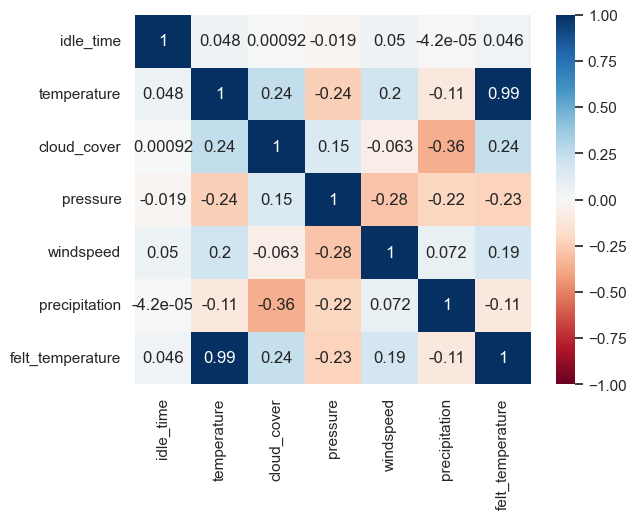

In [342]:
corr = weather_features.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

Looking at the heatmap, we can pick out the variables which are possibly correlated to idle time: temperature and windspeed. However, temperature and windspeed are also correlated (covariance 0.2) so we decided to only include temperature. The Cloud Cover Description, although not considered here, could also be interesting, which we will take a look at in the next steps.

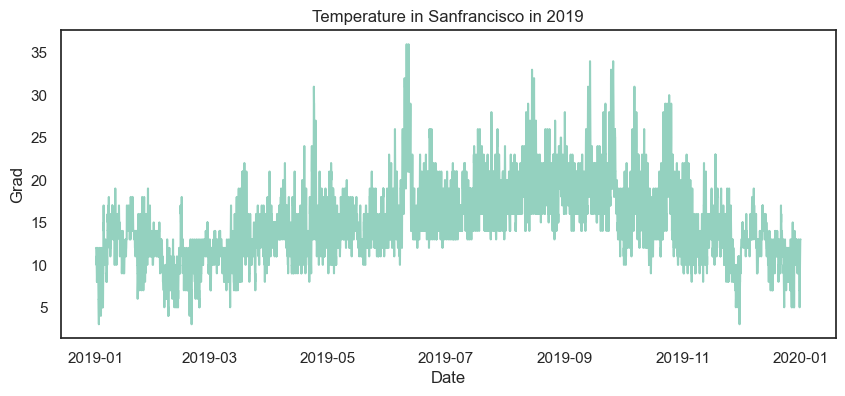

In [343]:
# let's have a look at the temperature in Sanfrancisco in 2019
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(weather_2019["timestamp"],weather_2019["temperature"])
ax.set_xlabel("Date")
ax.set_ylabel("Grad")
ax.set_title("Temperature in Sanfrancisco in 2019")
plt.show()


Our goal is to find out how the weather affects the bike rent business. We want to analyze the correlation between different conditions of weather (e.g Temperature, Windspeed) and the idle time of bike stations.

## Correlation Idle time - Temperature 

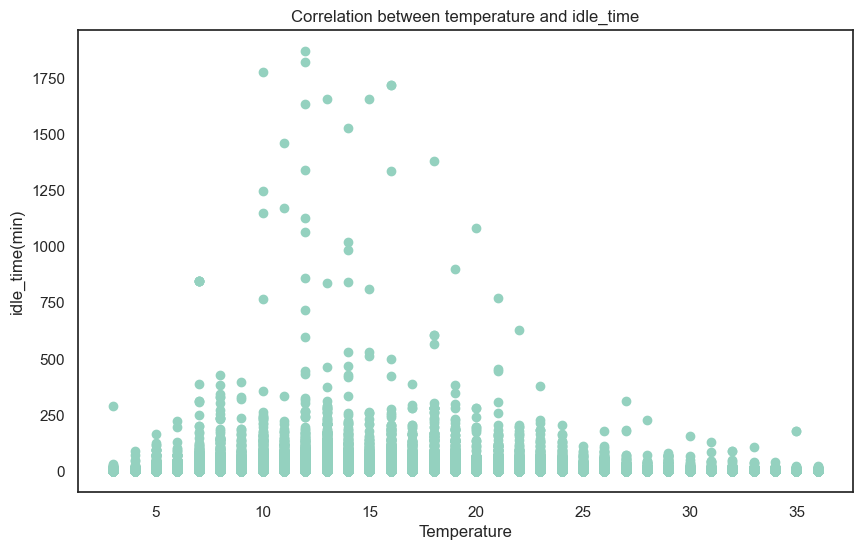

In [344]:
#Let's visualize the idle time with temperature
# first, let's create a figure object
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# define plot
ax.scatter(df_features["temperature"], df_features["idle_time"])

# add axis and title labels
ax.set_xlabel("Temperature")
ax.set_ylabel("idle_time(min)")
ax.set_title("Correlation between temperature and idle_time")

# save figure and show
plt.show()

In [116]:
unique_cloud_cover = wd['cloud_cover_description'].unique()
print(unique_cloud_cover)


['Partly Cloudy' 'Fair / Windy' 'Fair' 'Mostly Cloudy' 'Haze' 'Cloudy'
 'Light Rain' 'Cloudy / Windy' 'Light Rain / Windy' 'Rain'
 'Mostly Cloudy / Windy' 'Fog' 'T-Storm' 'Rain / Windy' 'Heavy Rain'
 'Heavy Rain / Windy' 'Partly Cloudy / Windy' 'Light Rain with Thunder'
 'T-Storm / Windy' 'Heavy T-Storm / Windy' 'Thunder' 'Haze / Windy'
 'Light Drizzle']


In [117]:

rain_values = ['Rain', 'Light Rain', 'Light Rain / Windy', 'Rain / Windy', 'Heavy Rain',
               'Heavy Rain / Windy', 'Light Rain with Thunder', 'Light Drizzle']
df_features['rain'] = (df_features['cloud_cover_description'].isin(rain_values)).astype(int)



In [118]:
df_features

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0           timestamp  \
0                   0             0           0 2019-01-01 01:00:00   
1                   1             7           7 2019-01-01 09:00:00   
2                   2             8           8 2019-01-01 09:00:00   
3                   3             9           9 2019-01-01 09:00:00   
4                   4            10          10 2019-01-01 10:00:00   
...               ...           ...         ...                 ...   
2407240       2407240       4814479     4814479 2019-12-23 17:00:00   
2407241       2407241       4814481     4814481 2019-12-24 10:00:00   
2407242       2407242       4814485     4814485 2019-12-30 14:00:00   
2407243       2407243       4814487     4814487 2019-12-30 14:00:00   
2407244       2407244       4814489     4814489 2019-12-31 12:00:00   

         station_id  bike_id  rented  idle_time  bike_count  temperature  \
0                 3     5426       0   0.000000           1         12.0   
1                 3     2191       0   1.888056           1         10.0   
2                 3     5063       0   1.796667           2         10.0   
3                 3     5262       0   1.640000           3         10.0   
4                 3     5354       0   0.518611           4          9.0   
...             ...      ...     ...        ...         ...          ...   
2407240         498   353685       0  16.258056           2         10.0   
2407241         498    10310       0   3.266944           2          8.0   
2407242         498    10962       0   0.006389           1          9.0   
2407243         498    10962       0  20.881111           1          9.0   
2407244         498    10962       0   0.000000           1          5.0   

         cloud_cover cloud_cover_description  pressure  windspeed  \
0               33.0            Fair / Windy   1016.57       35.0   
1               33.0                    Fair   1019.62       30.0   
2               33.0                    Fair   1019.62       30.0   
3               33.0                    Fair   1019.62       30.0   
4               33.0            Fair / Windy   1020.63       37.0   
...              ...                     ...       ...        ...   
2407240         30.0           Partly Cloudy   1013.52        6.0   
2407241         33.0                    Fair   1011.83       15.0   
2407242         34.0                    Fair   1019.62       11.0   
2407243         34.0                    Fair   1019.62       11.0   
2407244         33.0                    Fair   1019.96        6.0   

         precipitation  felt_temperature    year  rain  
0                  0.0              12.0  2019.0     0  
1                  0.0              10.0  2019.0     0  
2                  0.0              10.0  2019.0     0  
3                  0.0              10.0  2019.0     0  
4                  0.0               5.0  2019.0     0  
...                ...               ...     ...   ...  
2407240            0.0              10.0  2019.0     0  
2407241            0.0               6.0  2019.0     0  
2407242            0.0               7.0  2019.0     0  
2407243            0.0               7.0  2019.0     0  
2407244            0.0               5.0  2019.0     0  

[2407245 rows x 18 columns]

#### Description of the Hypothesis Test:

We conducted a hypothesis test to examine the average waiting time during rainy hours compared to non-rainy hours in a specific dataset. The purpose was to determine if there is a statistically significant difference in waiting times between rainy and non-rainy hours overall.

Null Hypothesis (H0): The average idle time in rainy hours is less than that in non-rainy hours.

Alternative Hypothesis (H1): The average idle time in rainy hours is greater than that in non-rainy hours.

A significance level of 0.05 was chosen. If the resulting p-value is below the significance level, we reject the null hypothesis, indicating a statistically significant difference in the average waiting time between rainy and non-rainy hours. Conversely, if the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, implying no statistically significant difference

In [91]:
import scipy.stats as stats

rain = df_features[df_features['rain'] == 1.0]['idle_time']
non_rain= df_features[df_features['rain'] == 0.0]['idle_time']


# Hypothesis test (paired t-Test)
t_statistic, p_value = stats.ttest_ind(rain , non_rain, alternative = 'greater', equal_var = False)

# print results
alpha = 0.05  # Significance level
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if p_value < alpha:
    print("H0 is rejected, which means idle time in rainy hours is statistically greater than that in non rainy hours.")
else:
    print("H0 cannot be rejected")

T-Statistic: 8.05048407185596
P-Value: 4.17210167289518e-16
H0 is rejected, which means idle time in rainy hours is statistically greater than that in non rainy hours.


From the t-test we can conclude that the rain affects the idle time such that bike station stays idle longer during rainy hours.

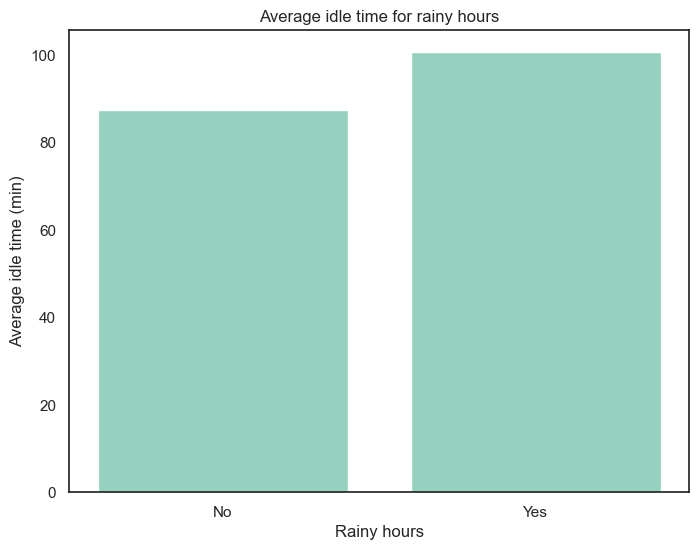

In [88]:
import matplotlib.pyplot as plt

# Calculate the average idle time for each group of rainy hours
average_idle_time = df_features.groupby("rain")["idle_time"].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

# Add axis and title labels
ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Rainy hours")
ax.set_ylabel("Average idle time (min)")
ax.set_title("Average idle time for rainy hours")

# Show the plot
plt.show()


## Working with time data

In [349]:

#We add another feature which is day of week as we want to inspect its effect later.
def get_weekday(ts):
    if ts.weekday() in [0,1,2,3,4]:
     return 1
    else :
     return 0
    

df_features['hour']= df_features['timestamp'].dt.hour
df_features['IsWeekday']= df_features["timestamp"].apply(lambda x: get_weekday(x))
df_features['month']= df_features['timestamp'].dt.month


## Correlation Idle time - Weekday

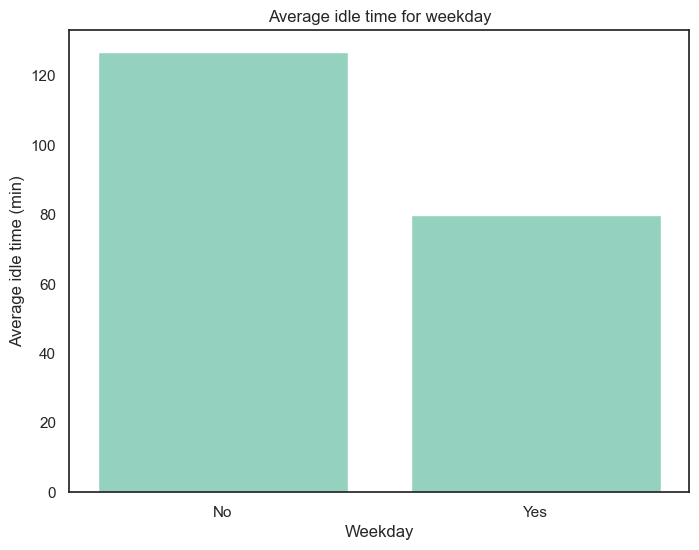

In [89]:
average_idle_time = df_features.groupby("IsWeekday")["idle_time"].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

# Add axis and title labels
ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Weekday")
ax.set_ylabel("Average idle time (min)")
ax.set_title("Average idle time for weekday")

# Show the plot
plt.show()

In [351]:
#drop unnecessary columns 
df_features.drop(['Unnamed: 0','Unnamed: 0.1','cloud_cover_description',  'year' , 'rented', ], axis=1, inplace= True)


# Working with location data

In [92]:

location_df=pd.read_csv("NorthernCalifornia_POIs")
clean_df = pd.read_csv("baywheels_2019_cleaned")
location_df= location_df.drop(location_df[(location_df['lat'].isnull())| (location_df['lon'].isnull())].index)
location_df.head(10)


/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_23624/3084636911.py:1: DtypeWarning: Columns (4,10,12,13,14,21,22,25,26,27,28,29,31,32,33,34,35,36,37,38,39,41,42,43,44,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,100,101,104,105,106,107,108,109,110,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  location_df=pd.read_csv("NorthernCalifornia_POIs")


Unnamed: 0  version   timestamp  changeset        id  \
0           0        3  1567817615        0.0  15972546   
1           1        9  1511822788        0.0  26637661   
2           2        5  1413753424        0.0  29946571   
3           3        1  1190872143        0.0  33112985   
4           4        2  1250367159        0.0  33113436   
5           5        4  1384460103        0.0  34351134   
6           6        2  1215113200        0.0  34496815   
7           7        2  1195174901        0.0  35677198   
8           8        2  1247006322        0.0  35677199   
9           9        1  1187821762        0.0  35706507   

                                                tags        lat         lon  \
0  {"brand":"Chase","brand:wikidata":"Q524629","b...  36.979366 -122.020730   
1  {"direction":"45-112","ele":"1343","name:zh":"...  37.715797 -119.676900   
2                                {"access":"public"}  40.685482 -121.418990   
3                              {"created_by":"JOSM"}  41.823452 -121.501750   
4                                                NaN  41.758180 -121.568170   
5                                                NaN  37.865540 -122.243400   
6                                                NaN  37.864998 -122.245346   
7                              {"created_by":"JOSM"}  41.729420 -121.512280   
8                              {"created_by":"JOSM"}  41.740776 -121.525340   
9                              {"created_by":"JOSM"}  37.879470 -122.226160   

  addr:city addr:country  ...  bbq restaurant social_centre caravan deli golf  \
0       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
1       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
2       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
3       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
4       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
5       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
6       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
7       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
8       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   
9       NaN          NaN  ...  NaN        NaN           NaN     NaN  NaN  NaN   

  laundry swimming_pool trailer tyres  
0     NaN           NaN     NaN   NaN  
1     NaN           NaN     NaN   NaN  
2     NaN           NaN     NaN   NaN  
3     NaN           NaN     NaN   NaN  
4     NaN           NaN     NaN   NaN  
5     NaN           NaN     NaN   NaN  
6     NaN           NaN     NaN   NaN  
7     NaN           NaN     NaN   NaN  
8     NaN           NaN     NaN   NaN  
9     NaN           NaN     NaN   NaN  

[10 rows x 114 columns]

In [93]:
location_geo = gpd.GeoDataFrame(location_df, geometry=gpd.points_from_xy(location_df['lon'], location_df['lat']))


In [97]:
city =["San Francisco","South San Francisco", "San Jose","Oakland"]
location_geo = location_geo[location_geo['addr:city'].isin(city)] 

In [356]:
location_geo['amenity'].unique()


array(['pub', 'bar', 'post_box', nan, 'cinema', 'bank',
       'place_of_worship', 'cafe', 'nightclub', 'restaurant', 'toilets',
       'parking', 'library', 'animal_boarding', 'pharmacy',
       'community_centre', 'language_school', 'nursing_home', 'school',
       'post_office', 'doctors', 'college', 'fuel', 'police', 'theatre',
       'taxi', 'car_rental', 'fast_food', 'dentist', 'clinic',
       'ice_cream', 'social_centre', 'car_sharing', 'atm', 'music_school',
       'arts_centre', 'parking_entrance', 'car_wash', 'social_facility',
       'veterinary', 'prep_school', 'conference_centre',
       'vending_machine', 'vintage and modern resale', 'public_bookcase',
       'studio', 'bicycle_rental', 'ferry_terminal',
       'bicycle_repair_station', 'dojo', 'fire_station', 'events_venue',
       'training', 'money_transfer', 'coworking_space', 'hookah_lounge',
       'marketplace', 'credit_union', 'popcorn', 'spa', 'animal_shelter',
       'kindergarten', 'childcare', 'driving_school

In [98]:
location_geo.dropna(axis= 'columns',thresh=2000, inplace=True)


In [99]:
station_location = clean_df.loc[:,['start_station_id', 'start_station_lat', 'start_station_lon']]
station_location.rename(columns = {"start_station_id": "station_id", "start_station_lat": "lat","start_station_lon": "lon"}, inplace=True)

In [100]:
station_location=station_location.drop_duplicates(subset='station_id')
station_location.sort_values(by= 'station_id',inplace= True)


In [101]:
station_geo = gpd.GeoDataFrame(station_location, geometry=gpd.points_from_xy(station_location['lon'], station_location['lat']))

In [102]:
public_transport =["bus_station"]
bus_geo = location_geo[location_geo['amenity'].isin(public_transport)] 
school= ["college","university","school"]
school_geo = location_geo[location_geo['amenity'].isin(school)]
leisure =["pub","bar","cafe","restaurant","fast_food","nightclub","cinema","theater"]
leisure_geo = location_geo[location_geo['amenity'].isin(leisure)]


In [103]:
station_geo = station_geo.set_crs(epsg=4326)
location_geo = location_geo.set_crs(epsg=4326)
bus_geo = bus_geo.set_crs(epsg=4326)
school_geo = school_geo.set_crs(epsg=4326)
leisure_geo = leisure_geo.set_crs(epsg=4326)

In [104]:
location_geo = location_geo.to_crs(epsg= 25832)
station_geo = station_geo.to_crs(epsg= 25832)
bus_geo = bus_geo.to_crs(epsg= 25832)
school_geo = school_geo.to_crs(epsg= 25832)
leisure_geo = leisure_geo.to_crs(epsg= 25832)

In [105]:
bus_geo = bus_geo.reset_index(drop=True)
station_geo = station_geo.reset_index(drop=True)
school_geo = school_geo.reset_index(drop=True)
leisure_geo = leisure_geo.reset_index(drop=True)


In [106]:
buffered_bus_station = bus_geo.buffer(1000)
all_bus_station = buffered_bus_station.unary_union 
station_geo['near_bus_station'] = station_geo.within(all_bus_station)
station_geo['near_bus_station'] = station_geo['near_bus_station'].replace(True,1)
station_geo['near_bus_station'] = station_geo['near_bus_station'].replace(False,0)

buffered_school = school_geo.buffer(1000)
all_schools = buffered_school.unary_union 
station_geo['near_school'] = station_geo.within(all_schools)
station_geo['near_school'] = station_geo['near_school'].replace(True,1)
station_geo['near_school'] = station_geo['near_school'].replace(False,0)
buffered_leisure = leisure_geo.buffer(1000)
all_leisure = buffered_leisure.unary_union 
station_geo['near_leisure_spots'] = station_geo.within(all_leisure)
station_geo['near_leisure_spots'] = station_geo['near_leisure_spots'].replace(True,1)
station_geo['near_leisure_spots'] = station_geo['near_leisure_spots'].replace(False,0)



In [119]:
df_features = pd.merge(df_features, station_geo, on='station_id', how='left')

In [121]:
df_features.drop(['geometry'], axis=1, inplace=True)

In [122]:
#df_features.drop(['cloud_cover','windspeed','pressure','precipitation','felt_temperature'],axis=1,inplace = True)
df_features.drop(['cloud_cover','pressure','precipitation','felt_temperature'],axis=1,inplace = True)

In [123]:
df_features

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0           timestamp  \
0                   0             0           0 2019-01-01 01:00:00   
1                   1             7           7 2019-01-01 09:00:00   
2                   2             8           8 2019-01-01 09:00:00   
3                   3             9           9 2019-01-01 09:00:00   
4                   4            10          10 2019-01-01 10:00:00   
...               ...           ...         ...                 ...   
2407240       2407240       4814479     4814479 2019-12-23 17:00:00   
2407241       2407241       4814481     4814481 2019-12-24 10:00:00   
2407242       2407242       4814485     4814485 2019-12-30 14:00:00   
2407243       2407243       4814487     4814487 2019-12-30 14:00:00   
2407244       2407244       4814489     4814489 2019-12-31 12:00:00   

         station_id  bike_id  rented  idle_time  bike_count  temperature  \
0                 3     5426       0   0.000000           1         12.0   
1                 3     2191       0   1.888056           1         10.0   
2                 3     5063       0   1.796667           2         10.0   
3                 3     5262       0   1.640000           3         10.0   
4                 3     5354       0   0.518611           4          9.0   
...             ...      ...     ...        ...         ...          ...   
2407240         498   353685       0  16.258056           2         10.0   
2407241         498    10310       0   3.266944           2          8.0   
2407242         498    10962       0   0.006389           1          9.0   
2407243         498    10962       0  20.881111           1          9.0   
2407244         498    10962       0   0.000000           1          5.0   

        cloud_cover_description  windspeed    year  rain       lat        lon  \
0                  Fair / Windy       35.0  2019.0     0  37.78638 -122.40490   
1                          Fair       30.0  2019.0     0  37.78638 -122.40490   
2                          Fair       30.0  2019.0     0  37.78638 -122.40490   
3                          Fair       30.0  2019.0     0  37.78638 -122.40490   
4                  Fair / Windy       37.0  2019.0     0  37.78638 -122.40490   
...                         ...        ...     ...   ...       ...        ...   
2407240           Partly Cloudy        6.0  2019.0     0  37.72589 -122.45244   
2407241                    Fair       15.0  2019.0     0  37.72589 -122.45244   
2407242                    Fair       11.0  2019.0     0  37.72589 -122.45244   
2407243                    Fair       11.0  2019.0     0  37.72589 -122.45244   
2407244                    Fair        6.0  2019.0     0  37.72589 -122.45244   

         near_bus_station  near_school  near_leisure_spots  
0                     0.0          0.0                 1.0  
1                     0.0          0.0                 1.0  
2                     0.0          0.0                 1.0  
3                     0.0          0.0                 1.0  
4                     0.0          0.0                 1.0  
...                   ...          ...                 ...  
2407240               0.0          1.0                 1.0  
2407241               0.0          1.0                 1.0  
2407242               0.0          1.0                 1.0  
2407243               0.0          1.0                 1.0  
2407244               0.0          1.0                 1.0  

[2407245 rows x 19 columns]

The first noticable pattern is the idle time can get up to very long if the station is not near any school or bus station. Being close to bus stations reduces the idle time evidently. Obviously, being close to schools, bus stations and leisure spots at the same time keeps the idle time in average even lower, since this is probably a busy spot.

In [371]:
df_features.timestamp

0         2019-01-01 01:00:00
1         2019-01-01 09:00:00
2         2019-01-01 09:00:00
3         2019-01-01 09:00:00
4         2019-01-01 10:00:00
                  ...        
2407240   2019-12-23 17:00:00
2407241   2019-12-24 10:00:00
2407242   2019-12-30 14:00:00
2407243   2019-12-30 14:00:00
2407244   2019-12-31 12:00:00
Name: timestamp, Length: 2407245, dtype: datetime64[ns]

In [372]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
start_date = '2019-01-01'
end_date = '2019-12-31'
holidays = cal.holidays(start=start_date, end=end_date)

df_features['year'] = df_features['timestamp'].dt.year
df_features['day'] = df_features['timestamp'].dt.day


# Create a new 'date' column with the timestamp
df_features['date'] = pd.to_datetime(df_features[['year', 'month', 'day']])
df_features['IsHoliday'] = (df_features['date'].isin(holidays)).astype(int)

In [373]:
df_features.drop(['year','day'],axis = 1,inplace= True)

In [374]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

hour_arr = np.array(df_features['hour'])
# month_arr = np.array(df['month'])


df_features['hour_sin'] = sin_transformer(24).fit_transform(hour_arr.reshape(-1,1))
df_features['hour_cos'] = cos_transformer(24).fit_transform(hour_arr.reshape(-1,1))
# df['month_sin'] = sin_transformer(12).fit_transform(month_arr.reshape(-1,1))
# df['month_cos'] = cos_transformer(12).fit_transform(month_arr.reshape(-1,1))


In [375]:
from sklearn.preprocessing import OneHotEncoder


# Define the mapping of months to seasons
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Map the month values to seasons using the defined mapping
df_features['season'] = df_features['month'].map(season_mapping)

# Perform one-hot encoding on the 'season' column
encoder = OneHotEncoder(sparse=False)
df_features['season'] = encoder.fit_transform(df_features[['season']])





C:\Users\LINHKHANHSPC\anaconda3\envs\dsml_geo\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [134]:
#drop all idle time that is less than 1 minute and more than a day
df_features.drop(df_features[(df_features.idle_time<0.0167) | (df_features.idle_time>24)].index,inplace= True)

In [268]:
df_features

timestamp  station_id  bike_id  idle_time  bike_count   
1       2019-01-01 09:00:00           3     2191   1.888056           1  \
2       2019-01-01 09:00:00           3     5063   1.796667           2   
3       2019-01-01 09:00:00           3     5262   1.640000           3   
4       2019-01-01 10:00:00           3     5354   0.518611           4   
5       2019-01-01 10:00:00           3     4760   0.428333           5   
...                     ...         ...      ...        ...         ...   
2407237 2019-12-31 08:00:00         495    12716   4.239167           4   
2407239 2019-12-23 17:00:00         498    12424   0.018056           2   
2407240 2019-12-23 17:00:00         498   353685  16.258056           2   
2407241 2019-12-24 10:00:00         498    10310   3.266944           2   
2407243 2019-12-30 14:00:00         498    10962  20.881111           1   

         temperature  windspeed  rain  hour  IsWeekday  ...       lat   
1               10.0       30.0     0     9          1  ...  37.78638  \
2               10.0       30.0     0     9          1  ...  37.78638   
3               10.0       30.0     0     9          1  ...  37.78638   
4                9.0       37.0     0    10          1  ...  37.78638   
5                9.0       37.0     0    10          1  ...  37.78638   
...              ...        ...   ...   ...        ...  ...       ...   
2407237          9.0        0.0     0     8          1  ...  37.34321   
2407239         10.0        6.0     0    17          1  ...  37.72589   
2407240         10.0        6.0     0    17          1  ...  37.72589   
2407241          8.0       15.0     0    10          1  ...  37.72589   
2407243          9.0       11.0     0    14          1  ...  37.72589   

               lon  near_bus_station  near_school  near_leisure_spots   
1       -122.40490               0.0          0.0                 1.0  \
2       -122.40490               0.0          0.0                 1.0   
3       -122.40490               0.0          0.0                 1.0   
4       -122.40490               0.0          0.0                 1.0   
5       -122.40490               0.0          0.0                 1.0   
...            ...               ...          ...                 ...   
2407237 -121.88439               0.0          0.0                 1.0   
2407239 -122.45244               0.0          1.0                 1.0   
2407240 -122.45244               0.0          1.0                 1.0   
2407241 -122.45244               0.0          1.0                 1.0   
2407243 -122.45244               0.0          1.0                 1.0   

              date IsHoliday  hour_sin  hour_cos  season  
1       2019-01-01         1  0.707107 -0.707107     0.0  
2       2019-01-01         1  0.707107 -0.707107     0.0  
3       2019-01-01         1  0.707107 -0.707107     0.0  
4       2019-01-01         1  0.500000 -0.866025     0.0  
5       2019-01-01         1  0.500000 -0.866025     0.0  
...            ...       ...       ...       ...     ...  
2407237 2019-12-31         0  0.866025 -0.500000     0.0  
2407239 2019-12-23         0 -0.965926 -0.258819     0.0  
2407240 2019-12-23         0 -0.965926 -0.258819     0.0  
2407241 2019-12-24         0  0.500000 -0.866025     0.0  
2407243 2019-12-30         0 -0.500000 -0.866025     0.0  

[2225262 rows x 21 columns]

In [135]:
y = df_features.loc[:,['idle_time','near_bus_station','near_school','near_leisure_spots']]

In [136]:
y_1 = y[(y.near_bus_station==0) & (y.near_school==0) & (y.near_leisure_spots==0)]
y_1 = y_1.idle_time.mean()
y_2 = y[(y.near_bus_station==0) & (y.near_school==0) & (y.near_leisure_spots==1)]
y_2 = y_2.idle_time.mean()
y_3 = y[(y.near_bus_station==1) & (y.near_school==0) & (y.near_leisure_spots==0)]
y_3 = y_3.idle_time.mean()
y_4 = y[(y.near_bus_station==1) & (y.near_school==0) & (y.near_leisure_spots==1)]
y_4 = y_4.idle_time.mean()
y_5 = y[(y.near_bus_station==0) & (y.near_school==1) & (y.near_leisure_spots==0)]
y_5 = y_5.idle_time.mean()
y_6 = y[(y.near_bus_station==0) & (y.near_school==1) & (y.near_leisure_spots==1)]
y_6 = y_6.idle_time.mean()
y_7 = y[(y.near_bus_station==1) & (y.near_school==1) & (y.near_leisure_spots==0)]
y_7 = y_7.idle_time.mean()
y_8 = y[(y.near_bus_station==1) & (y.near_school==1) & (y.near_leisure_spots==1)]
y_8 = y_8.idle_time.mean()

## Correlation Idle time - Local points of interest

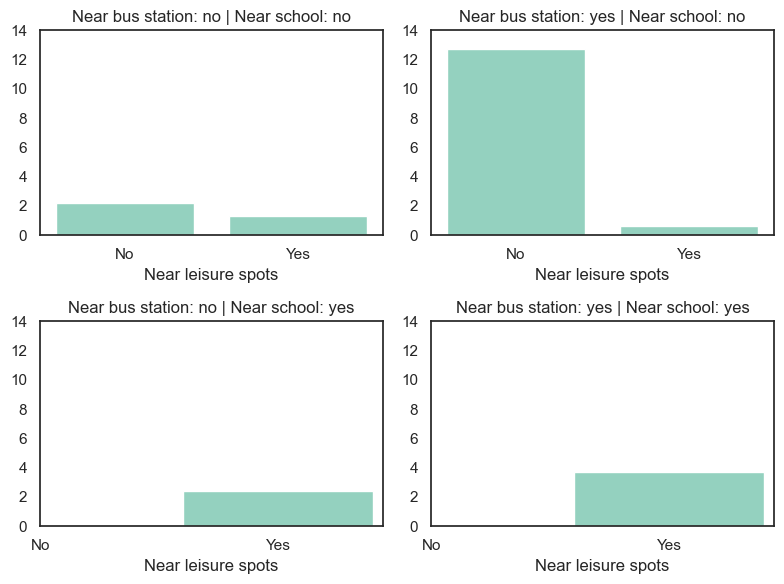

In [137]:
# We want to observe how the location of the station (whether it is close to important places) affects the idle time 
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [1, 1]})
x = [0,1]
# Plot the first bar plot in the top-left subplot
axes[0, 0].bar(x, [y_1,y_2])
axes[0, 0].set_title('Near bus station: no | Near school: no')
axes[0,0].set_xticks([0,1],["No","Yes"])
axes[0,0].set_yticks(range(0,15,2))
axes[0,0].set_xlabel('Near leisure spots')

# Plot the second bar plot in the top-right subplot
axes[0, 1].bar(x, [y_3,y_4])
axes[0, 1].set_title('Near bus station: yes | Near school: no')
axes[0,1].set_xticks([0,1],["No","Yes"])
axes[0,1].set_yticks(range(0,15,2))
axes[0,1].set_xlabel('Near leisure spots')

# Plot the third bar plot in the bottom-left subplot
x = [0,1]
axes[1, 0].bar(x, [y_5,y_6])
axes[1, 0].set_title('Near bus station: no | Near school: yes')
axes[1,0].set_xticks([0,1],["No","Yes"])
axes[1,0].set_yticks(range(0,15,2))
axes[1,0].set_xlabel('Near leisure spots')

# Plot the fourth bar plot in the bottom-right subplot
axes[1, 1].bar(x, [y_7,y_8])
axes[1, 1].set_title('Near bus station: yes | Near school: yes')
axes[1,1].set_xticks([0,1],["No","Yes"])
axes[1,1].set_yticks(range(0,15,2))
axes[1,1].set_xlabel('Near leisure spots')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Looking at the plots, we can see that the mean idle time is the highest when the station is near bus stations, but not school or leisure spots. Generally, the idle time is reduced if a station is close to leisure spots. 

In [397]:
# putting start lon/lat and end lon/lat together in one column each
df_features["coordinates"] = list(zip(df_features["lat"], df_features["lon"]))
df_features.head()

timestamp  station_id  bike_id  idle_time  bike_count   
1 2019-01-01 09:00:00           3     2191   1.888056           1  \
2 2019-01-01 09:00:00           3     5063   1.796667           2   
3 2019-01-01 09:00:00           3     5262   1.640000           3   
4 2019-01-01 10:00:00           3     5354   0.518611           4   
5 2019-01-01 10:00:00           3     4760   0.428333           5   

   temperature  windspeed  rain  hour  IsWeekday  ...       lon   
1         10.0       30.0     0     9          1  ... -122.4049  \
2         10.0       30.0     0     9          1  ... -122.4049   
3         10.0       30.0     0     9          1  ... -122.4049   
4          9.0       37.0     0    10          1  ... -122.4049   
5          9.0       37.0     0    10          1  ... -122.4049   

   near_bus_station  near_school  near_leisure_spots       date  IsHoliday   
1               0.0          0.0                 1.0 2019-01-01          1  \
2               0.0          0.0                 1.0 2019-01-01          1   
3               0.0          0.0                 1.0 2019-01-01          1   
4               0.0          0.0                 1.0 2019-01-01          1   
5               0.0          0.0                 1.0 2019-01-01          1   

   hour_sin  hour_cos  season            coordinates  
1  0.707107 -0.707107     0.0  (37.78638, -122.4049)  
2  0.707107 -0.707107     0.0  (37.78638, -122.4049)  
3  0.707107 -0.707107     0.0  (37.78638, -122.4049)  
4  0.500000 -0.866025     0.0  (37.78638, -122.4049)  
5  0.500000 -0.866025     0.0  (37.78638, -122.4049)  

[5 rows x 22 columns]

In [404]:
df_map = df_features.sort_values(by = "timestamp")

In [407]:
df_map_jan = df_map[df_map.month == 1]
df_map_jan

timestamp  station_id  bike_id  idle_time  bike_count   
795770  2019-01-01 00:00:00          62     5339  12.794722           1  \
910702  2019-01-01 00:00:00          73     3034   1.098056           1   
2269526 2019-01-01 00:00:00         371     5246   9.602500           2   
616962  2019-01-01 00:00:00          44     5423   1.023611           2   
1605211 2019-01-01 00:00:00         179     5201  10.809444           2   
...                     ...         ...      ...        ...         ...   
1991964 2019-01-31 23:00:00         278      496   0.466667           3   
329051  2019-01-31 23:00:00          21     4960   0.143056         577   
1991965 2019-01-31 23:00:00         278     3945   0.059722           4   
2221047 2019-01-31 23:00:00         357     3815   8.406389           9   
2240466 2019-01-31 23:00:00         364     5275   0.144444          44   

         temperature  windspeed  rain  hour  IsWeekday  ...        lon   
795770          12.0       31.0     0     0          1  ... -122.40643  \
910702          12.0       31.0     0     0          1  ... -122.43371   
2269526         12.0       31.0     0     0          1  ... -122.41358   
616962          12.0       31.0     0     0          1  ... -122.41174   
1605211         12.0       31.0     0     0          1  ... -122.26789   
...              ...        ...   ...   ...        ...  ...        ...   
1991964         14.0        6.0     0    23          1  ... -121.90489   
329051          14.0        6.0     0    23          1  ... -122.40081   
1991965         14.0        6.0     0    23          1  ... -121.90489   
2221047         14.0        6.0     0    23          1  ... -121.89284   
2240466         14.0        6.0     0    23          1  ... -122.38997   

         near_bus_station  near_school  near_leisure_spots       date   
795770                0.0          0.0                 1.0 2019-01-01  \
910702                0.0          0.0                 1.0 2019-01-01   
2269526               0.0          0.0                 1.0 2019-01-01   
616962                0.0          0.0                 1.0 2019-01-01   
1605211               0.0          0.0                 1.0 2019-01-01   
...                   ...          ...                 ...        ...   
1991964               1.0          1.0                 1.0 2019-01-31   
329051                0.0          0.0                 1.0 2019-01-31   
1991965               1.0          1.0                 1.0 2019-01-31   
2221047               0.0          1.0                 1.0 2019-01-31   
2240466               1.0          0.0                 1.0 2019-01-31   

         IsHoliday  hour_sin  hour_cos  season             coordinates  
795770           1  0.000000  1.000000     0.0  (37.77779, -122.40643)  
910702           1  0.000000  1.000000     0.0  (37.77179, -122.43371)  
2269526          1  0.000000  1.000000     0.0  (37.80275, -122.41358)  
616962           1  0.000000  1.000000     0.0  (37.78107, -122.41174)  
1605211          1  0.000000  1.000000     0.0  (37.81607, -122.26789)  
...            ...       ...       ...     ...                     ...  
1991964          0 -0.258819  0.965926     0.0  (37.33193, -121.90489)  
329051           0 -0.258819  0.965926     0.0  (37.78963, -122.40081)  
1991965          0 -0.258819  0.965926     0.0  (37.33193, -121.90489)  
2221047          0 -0.258819  0.965926     0.0  (37.34113, -121.89284)  
2240466          0 -0.258819  0.965926     0.0    (37.772, -122.38997)  

[177829 rows x 22 columns]

In [408]:
# define empty map
map_combined = folium.Map(location=(df_map_jan.lat.values[0], df_map_jan.lon.values[0]), 
                       zoom_start=9, control_scale=True, max_zoom=20)

# add heatmap
HeatMap(df_map_jan.coordinates).add_to(map_combined)
map_combined

We are looking at the bike stations' operation in January. The busiest station can be seen in San Francisco, right next to the metro station. Overall, the stations which lie around points of interests (stations, schools, leisure spots..) are more visited than the ones in the outskirt.

In [273]:
df_features.drop(['lat','lon'],axis =1, inplace = True)

In [274]:
df_features

timestamp  station_id  bike_id  idle_time  bike_count   
1       2019-01-01 09:00:00           3     2191   1.888056           1  \
2       2019-01-01 09:00:00           3     5063   1.796667           2   
3       2019-01-01 09:00:00           3     5262   1.640000           3   
4       2019-01-01 10:00:00           3     5354   0.518611           4   
5       2019-01-01 10:00:00           3     4760   0.428333           5   
...                     ...         ...      ...        ...         ...   
2407237 2019-12-31 08:00:00         495    12716   4.239167           4   
2407239 2019-12-23 17:00:00         498    12424   0.018056           2   
2407240 2019-12-23 17:00:00         498   353685  16.258056           2   
2407241 2019-12-24 10:00:00         498    10310   3.266944           2   
2407243 2019-12-30 14:00:00         498    10962  20.881111           1   

         temperature  windspeed  rain  hour  IsWeekday  month   
1               10.0       30.0     0     9          1      1  \
2               10.0       30.0     0     9          1      1   
3               10.0       30.0     0     9          1      1   
4                9.0       37.0     0    10          1      1   
5                9.0       37.0     0    10          1      1   
...              ...        ...   ...   ...        ...    ...   
2407237          9.0        0.0     0     8          1     12   
2407239         10.0        6.0     0    17          1     12   
2407240         10.0        6.0     0    17          1     12   
2407241          8.0       15.0     0    10          1     12   
2407243          9.0       11.0     0    14          1     12   

         near_bus_station  near_school  near_leisure_spots       date   
1                     0.0          0.0                 1.0 2019-01-01  \
2                     0.0          0.0                 1.0 2019-01-01   
3                     0.0          0.0                 1.0 2019-01-01   
4                     0.0          0.0                 1.0 2019-01-01   
5                     0.0          0.0                 1.0 2019-01-01   
...                   ...          ...                 ...        ...   
2407237               0.0          0.0                 1.0 2019-12-31   
2407239               0.0          1.0                 1.0 2019-12-23   
2407240               0.0          1.0                 1.0 2019-12-23   
2407241               0.0          1.0                 1.0 2019-12-24   
2407243               0.0          1.0                 1.0 2019-12-30   

         IsHoliday  hour_sin  hour_cos  season  
1                1  0.707107 -0.707107     0.0  
2                1  0.707107 -0.707107     0.0  
3                1  0.707107 -0.707107     0.0  
4                1  0.500000 -0.866025     0.0  
5                1  0.500000 -0.866025     0.0  
...            ...       ...       ...     ...  
2407237          0  0.866025 -0.500000     0.0  
2407239          0 -0.965926 -0.258819     0.0  
2407240          0 -0.965926 -0.258819     0.0  
2407241          0  0.500000 -0.866025     0.0  
2407243          0 -0.500000 -0.866025     0.0  

[2225262 rows x 19 columns]

In [275]:
df_features.reset_index(inplace=True)

In [276]:
df_features.drop(columns='index',inplace = True)

In [277]:
#Wr add a feature called bike frequency, which indicates how many bikes are rented in that hour  (bike/hour)
frequency = pd.read_csv("df_w_freq")

In [278]:
frequency['idle_time'] = frequency['idle_time']/60.0

In [279]:
frequency

Unnamed: 0.1  Unnamed: 0            timestamp  station_id  bike_id   
0                   0       19822  2019-04-01 00:30:01           3     3434  \
1                   2       32267  2019-06-01 00:15:46           3     1589   
2                   3       37976  2019-07-01 00:27:30           3     2103   
3                   4       55420  2019-10-01 00:07:59           3     9806   
4                   7           0  2019-01-01 01:05:01           3     5426   
...               ...         ...                  ...         ...      ...   
2407240       4814479     4814479  2019-12-23 17:58:33         498   353685   
2407241       4814481     4814481  2019-12-24 10:41:14         498    10310   
2407242       4814485     4814485  2019-12-30 14:29:13         498    10962   
2407243       4814487     4814487  2019-12-30 14:36:08         498    10962   
2407244       4814489     4814489  2019-12-31 12:17:46         498    10962   

         rented  idle_time  day  hour  bike_frequency  
0             0   0.598889    1     0               3  
1             0   0.930278    1     0               3  
2             0   7.568333    1     0               3  
3             0   1.617778    1     0               3  
4             0   0.000000    1     1              10  
...         ...        ...  ...   ...             ...  
2407240       0  16.258056   23    17               1  
2407241       0   3.266944   24    10               1  
2407242       0   0.006389   30    14               1  
2407243       0  20.881111   30    14               1  
2407244       0   0.000000   31    12               0  

[2407245 rows x 10 columns]

In [280]:
frequency.drop(frequency[(frequency.idle_time<0.0167) | (frequency.idle_time>24)].index,inplace= True)

In [281]:
frequency.sort_values(['station_id','timestamp'],inplace= True)

In [282]:
frequency.reset_index(inplace = True)
frequency.drop(columns= 'index',inplace = True)

In [284]:
#Afd colum bike frequency to the features data 
df_features['bike_freq']= frequency.bike_frequency

In [285]:
df_features

timestamp  station_id  bike_id  idle_time  bike_count   
0       2019-01-01 09:00:00           3     2191   1.888056           1  \
1       2019-01-01 09:00:00           3     5063   1.796667           2   
2       2019-01-01 09:00:00           3     5262   1.640000           3   
3       2019-01-01 10:00:00           3     5354   0.518611           4   
4       2019-01-01 10:00:00           3     4760   0.428333           5   
...                     ...         ...      ...        ...         ...   
2225257 2019-12-31 08:00:00         495    12716   4.239167           4   
2225258 2019-12-23 17:00:00         498    12424   0.018056           2   
2225259 2019-12-23 17:00:00         498   353685  16.258056           2   
2225260 2019-12-24 10:00:00         498    10310   3.266944           2   
2225261 2019-12-30 14:00:00         498    10962  20.881111           1   

         temperature  windspeed  rain  hour  IsWeekday  month   
0               10.0       30.0     0     9          1      1  \
1               10.0       30.0     0     9          1      1   
2               10.0       30.0     0     9          1      1   
3                9.0       37.0     0    10          1      1   
4                9.0       37.0     0    10          1      1   
...              ...        ...   ...   ...        ...    ...   
2225257          9.0        0.0     0     8          1     12   
2225258         10.0        6.0     0    17          1     12   
2225259         10.0        6.0     0    17          1     12   
2225260          8.0       15.0     0    10          1     12   
2225261          9.0       11.0     0    14          1     12   

         near_bus_station  near_school  near_leisure_spots       date   
0                     0.0          0.0                 1.0 2019-01-01  \
1                     0.0          0.0                 1.0 2019-01-01   
2                     0.0          0.0                 1.0 2019-01-01   
3                     0.0          0.0                 1.0 2019-01-01   
4                     0.0          0.0                 1.0 2019-01-01   
...                   ...          ...                 ...        ...   
2225257               0.0          0.0                 1.0 2019-12-31   
2225258               0.0          1.0                 1.0 2019-12-23   
2225259               0.0          1.0                 1.0 2019-12-23   
2225260               0.0          1.0                 1.0 2019-12-24   
2225261               0.0          1.0                 1.0 2019-12-30   

         IsHoliday  hour_sin  hour_cos  season  bike_freq  
0                1  0.707107 -0.707107     0.0         70  
1                1  0.707107 -0.707107     0.0         70  
2                1  0.707107 -0.707107     0.0         70  
3                1  0.500000 -0.866025     0.0         57  
4                1  0.500000 -0.866025     0.0         57  
...            ...       ...       ...     ...        ...  
2225257          0  0.866025 -0.500000     0.0          1  
2225258          0 -0.965926 -0.258819     0.0          1  
2225259          0 -0.965926 -0.258819     0.0          1  
2225260          0  0.500000 -0.866025     0.0          1  
2225261          0 -0.500000 -0.866025     0.0          1  

[2225262 rows x 20 columns]

In [289]:
df_features.isna().sum()

timestamp             0
station_id            0
bike_id               0
idle_time             0
bike_count            0
temperature           0
windspeed             0
rain                  0
hour                  0
IsWeekday             0
month                 0
near_bus_station      0
near_school           0
near_leisure_spots    0
date                  0
IsHoliday             0
hour_sin              0
hour_cos              0
season                0
bike_freq             0
dtype: int64

In [290]:
df_features.to_csv("Predict_ready_df")